In [2]:
# https://huggingface.co/intfloat/multilingual-e5-large/tree/main#/
import os
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch.nn.functional as F

import numpy as np
from torch import Tensor
from transformers import AutoTokenizer, AutoModel




# 将“query：”和“passage：”对非对称任务相应地使用，例如开放式QA中的段落检索、临时信息检索。
# 对称任务使用“query：”前缀，例如语义相似性、双文本挖掘、释义检索。
# 如果要将嵌入用作特征，请使用“query：”前缀，例如线性探测分类、聚类。
# Each input text should start with "query: " or "passage: ", even for non-English texts.
# For tasks other than retrieval, you can simply use the "query: " prefix.
input_texts = [
    # '先生',"男人","父亲",
#  '女士',"女人", "母亲 "


    '先生',"男人","父亲","男","帅哥","小伙",
 '女士',"女人", "母亲 ","女","美女","姑娘"
# "男孩","爸爸","皇帝","父亲","爷爷","孙子","新郎","丈夫","男人","侄子","王子","儿子","继父","叔叔", 40
# "女孩","妈妈","皇后","母亲","奶奶","孙女","新娘","妻子","女人","侄女","公主","女儿","继母","阿姨"
]


tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-large')

In [ ]:

# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')
# batch_dict.keys()  dict_keys(['input_ids', 'attention_mask'])
# batch_dict['input_ids'].shape  torch.Size([46, 5])
# batch_dict['attention_mask'].shape  # torch.Size([46, 5])
# tensor([[     0,      6,  72853,      2,      1],
#         [     0,      6,  49790,      2,      1],
#         [     0,      6,  35023,      2,      1],
#         [     0,      6, 180883,      2,      1],
# batch_dict['attention_mask']
# tensor([[1, 1, 1, 1, 0],
#         [1, 1, 1, 1, 0],

outputs = model(**batch_dict)

def average_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)  #torch.Size([40, 1024])

#保存 embeddings
np.save('embeddings.npy', embeddings.cpu().detach().numpy())

NameError: name 'tokenizer' is not defined

mode: Diff Dist
compute diff


100%|██████████| 36/36 [00:00<00:00, 311.19it/s]

compute out


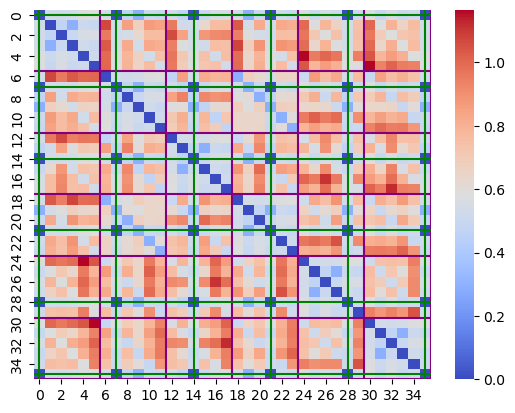

[0.0, 0.5359764099121094, 0.5319695472717285, 0.5382207036018372, 0.5831547975540161, 0.582035481929779, 0.5359764099121094, 0.4697594940662384, 0.29328498244285583, 0.5084275603294373, 0.4948700964450836, 0.5319695472717285, 0.4697594940662384, 0.49869945645332336, 0.5545647740364075, 0.5624552965164185, 0.5382207036018372, 0.29328498244285583, 0.49869945645332336, 0.5247144103050232, 0.5056219100952148, 0.5831547975540161, 0.5084275603294373, 0.5545647740364075, 0.5247144103050232, 0.5234647989273071, 0.582035481929779, 0.4948700964450836, 0.5624552965164185, 0.5056219100952148, 0.5234647989273071, 0.5359764099121094, 0.0, 0.4697595238685608, 0.29328498244285583, 0.5084275603294373, 0.4948700964450836, 1.0719528198242188, 0.5359764099121094, 0.8560945391654968, 0.6759379506111145, 0.8668731451034546, 0.8518033623695374, 0.9590883255004883, 0.5319695472717285, 0.5359764099121094, 0.6281909942626953, 0.7586563229560852, 0.7563566565513611, 1.0333869457244873, 0.5382207036018372, 0.8229

In [1]:
# 读取 
import Hlib
import numpy as np
import torch
embeddings = np.load('embeddings.npy')
# 转为 tensor
embeddings = torch.tensor(embeddings)


for i,j in Hlib.vector_modes.items():
    for ii,jj in Hlib.diff_modes.items():
        if i== "Cross" and ii == "JaccardSimilarity":
            continue
        out,nonSample,trSample = Hlib.plt_seaborn(embeddings,6,i,ii)
        print(nonSample)
        print(trSample)
        a,b = Hlib.find_ordered_positions(nonSample, trSample)
        print(a,b)


In [2]:
a = embeddings[0]
a

b = embeddings[6]
b

s1 = a - b


a = embeddings[1]
a

b = embeddings[7]
b

s2 = a - b

def Dist(v1, v2, p=2, Abso=True):
    temp = v1 - v2
    if Abso:
        temp = torch.abs(temp)
    return torch.sum(temp ** p) ** (1/p)

print(Dist(s1,s2))


tensor(0.5015)
